In [1]:
%matplotlib inline
# Import libraries
import pandas as pd
import bqplot.pyplot as plt
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.autolayout': True})

In [28]:
%%bash
bedtools coverage -a /home/biolinux/Escritorio/exons.bed -b 60632_S2.bam -d -split > exon_60632.txt

In [2]:
df = pd.read_table('exon_60632.txt', names = ["chr", "Start", "End", "Exon", "Pos_exon","Cov"])

In [3]:
#df

In [4]:
#df2 = pd.read_table('59440_conteo.txt', names = ["chr", "Start", "End", "Exon","Cov"])


In [5]:
#df2.head()

In [6]:
df1 = pd.read_csv('genes')

In [7]:
df1.head()

,genes
0,ABCA3
1,CSF2RA
2,CSF2RB
3,SFTPA1
4,SFTPB


In [8]:
#a = df1.columns.get_values()
#a

In [9]:
#genes = a.tolist()
#genes

In [10]:
genes = df1['genes'].tolist()

In [11]:
#genes = ['BMP1','COL1A1','COL1A2','CRTAP','FKBP10','IFITM5','LAMB3','LEPRE1','PPIB','SERPINF1','SERPINH1','SP7']
genes_ = '_,'.join(map(str, genes))

In [12]:
genes_

'ABCA3_,CSF2RA_,CSF2RB_,SFTPA1_,SFTPB_,SFTPC_,SFTPD'

In [13]:
g = genes_.split(',')

In [14]:
g

['ABCA3_', 'CSF2RA_', 'CSF2RB_', 'SFTPA1_', 'SFTPB_', 'SFTPC_', 'SFTPD']

In [15]:
len(g)

7

In [16]:
g[-1] = 'SFTPD_'

In [17]:
g = [x.strip(' ') for x in g]
g

['ABCA3_', 'CSF2RA_', 'CSF2RB_', 'SFTPA1_', 'SFTPB_', 'SFTPC_', 'SFTPD_']

In [18]:
todos = df[df['Exon'].str.contains('|'.join(g))]

In [19]:
todos

,chr,Start,End,Exon,Pos_exon,Cov
4047433,chr10,81371376,81371397,SFTPA1_2,1,56
4047434,chr10,81371376,81371397,SFTPA1_2,2,56
4047435,chr10,81371376,81371397,SFTPA1_2,3,56
4047436,chr10,81371376,81371397,SFTPA1_2,4,61
4047437,chr10,81371376,81371397,SFTPA1_2,5,61
4047438,chr10,81371376,81371397,SFTPA1_2,6,62
4047439,chr10,81371376,81371397,SFTPA1_2,7,62
4047440,chr10,81371376,81371397,SFTPA1_2,8,62
4047441,chr10,81371376,81371397,SFTPA1_2,9,62
4047442,chr10,81371376,81371397,SFTPA1_2,10,60


In [20]:
todos['Cov2'] = todos['Cov'].astype(bool)

/home/biolinux/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
todos['Cov2'] = todos['Cov2'].astype(int)

/home/biolinux/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
todos.to_csv('prueba.txt', sep ='\t')

/home/biolinux/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


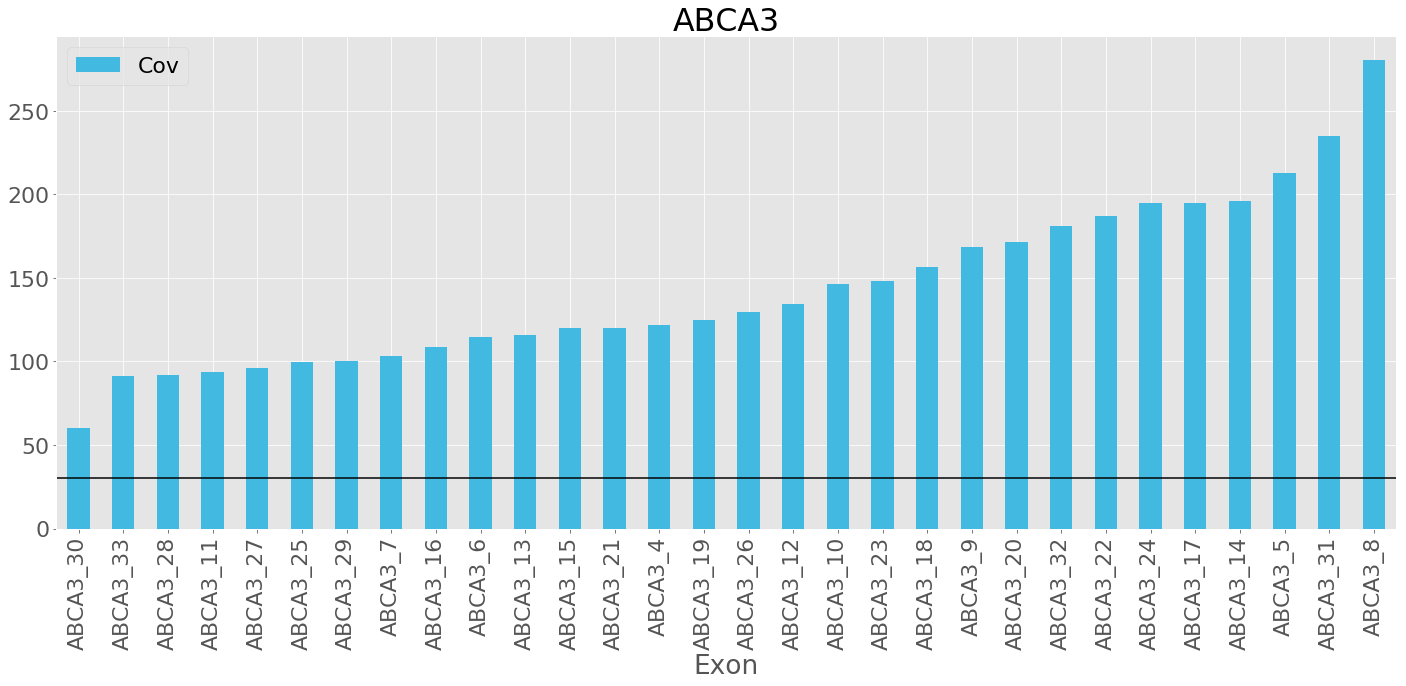

In [19]:
ABCA3 = todos[todos['Exon'].str.contains('^ABCA3_')]
ABCA3_1 = ABCA3[['Cov','Exon']].groupby('Exon').mean()
x1 = ABCA3_1.sort_values('Cov', ascending= True)
plot = x1.plot(kind="bar",figsize=(20, 10), title = 'ABCA3',color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("ABCA3.png", bbox_inches=0)

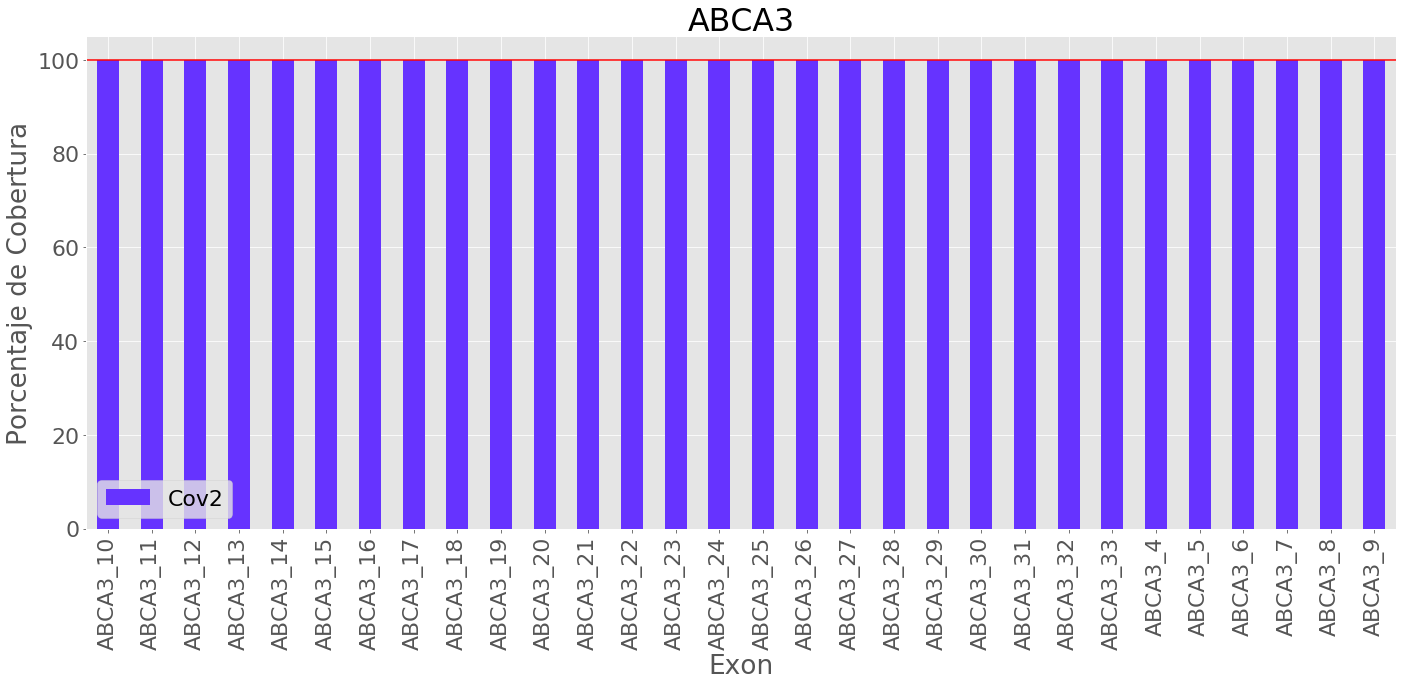

In [55]:
ABCA3_1 = ABCA3[['Cov2','Exon']].groupby('Exon').mean()*100
plot = ABCA3_1.plot(kind="bar",figsize=(20, 10), title = 'ABCA3',color = [('#6633FF')],);plt.axhline(100, color='r');
fig = plot.get_figure()
plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
fig.savefig("ABCA3AP.png", bbox_inches=0)

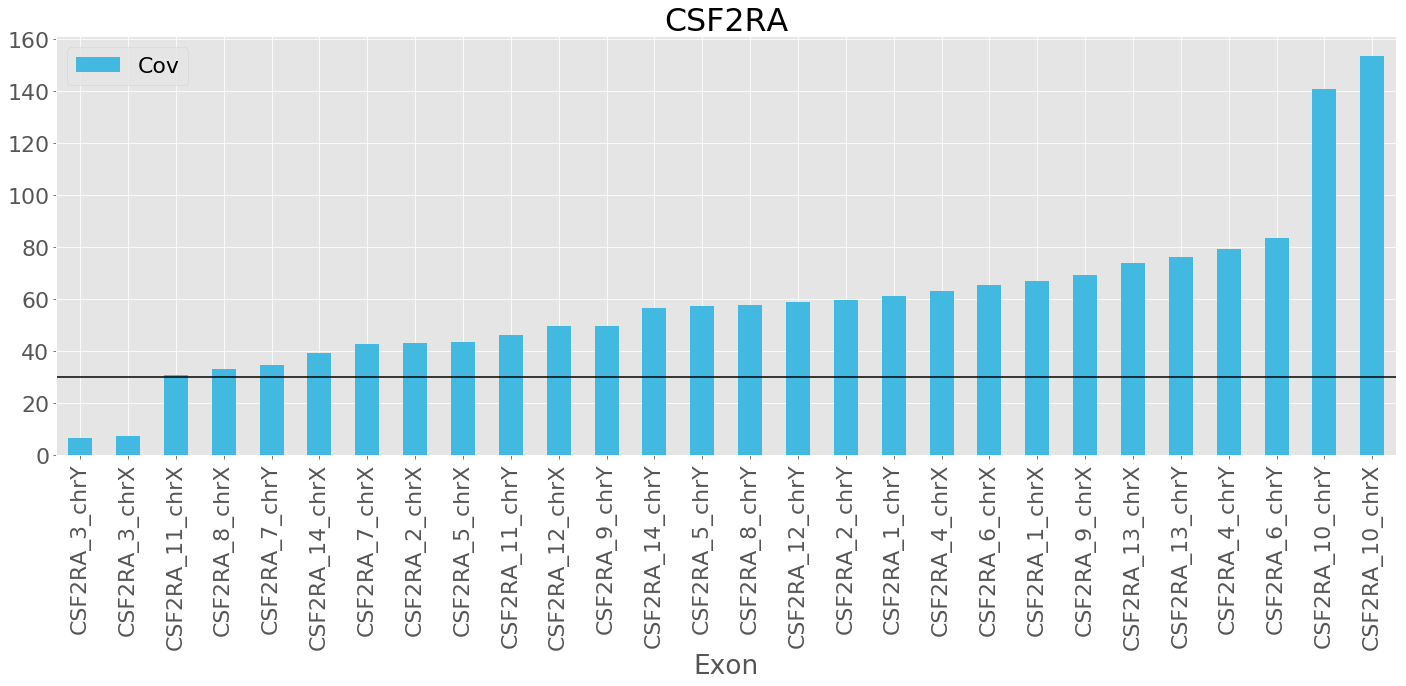

In [33]:
CSF2RA = todos[todos['Exon'].str.contains('^CSF2RA_')]
CSF2RA_1 = CSF2RA[['Cov','Exon']].groupby('Exon').mean()
x1 = CSF2RA_1.sort_values('Cov', ascending= True)
plot = x1.plot(kind="bar",figsize=(20, 10), title = 'CSF2RA',color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("CSF2RA.png", bbox_inches=0)

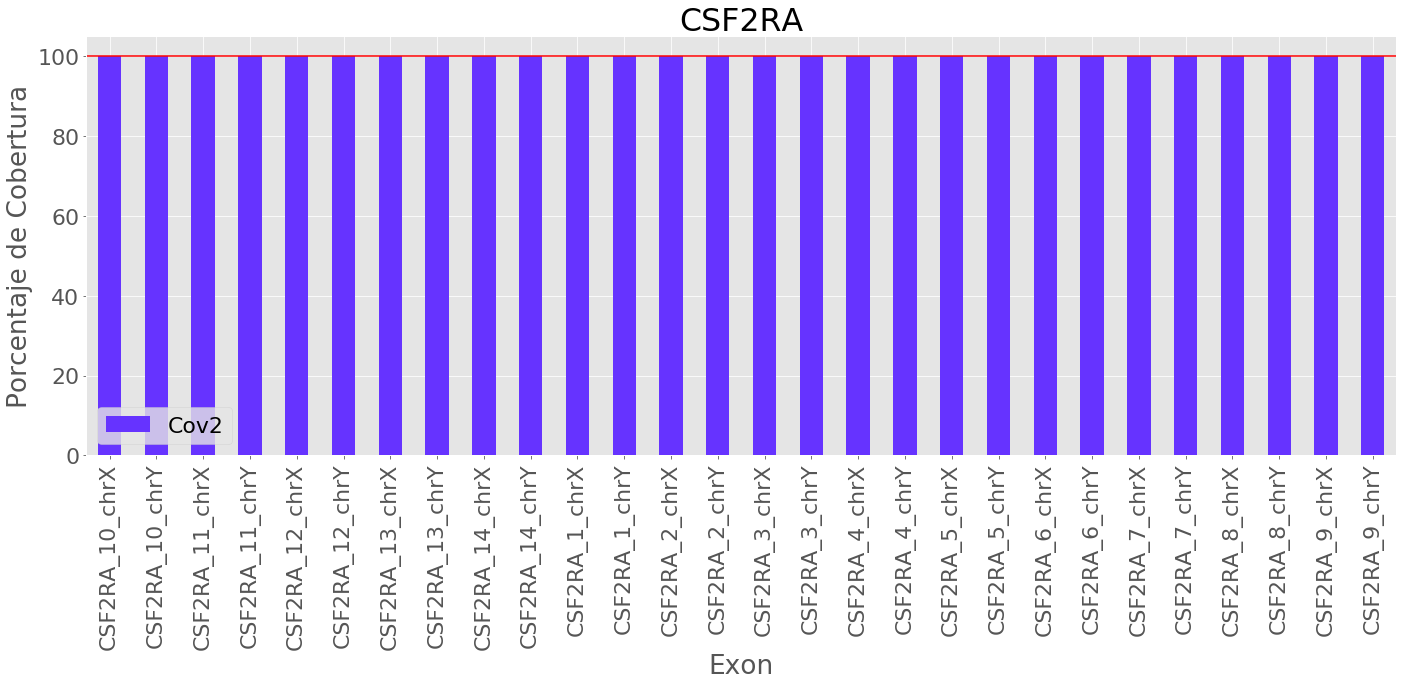

In [60]:
CSF2RA_1 = CSF2RA[['Cov2','Exon']].groupby('Exon').mean()*100
plot = CSF2RA_1.plot(kind="bar",figsize=(20, 10), title = 'CSF2RA',color = [('#6633FF')],);plt.axhline(100, color='r');
fig = plot.get_figure()
plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
fig.savefig("CSF2RA_P.png", bbox_inches=0)

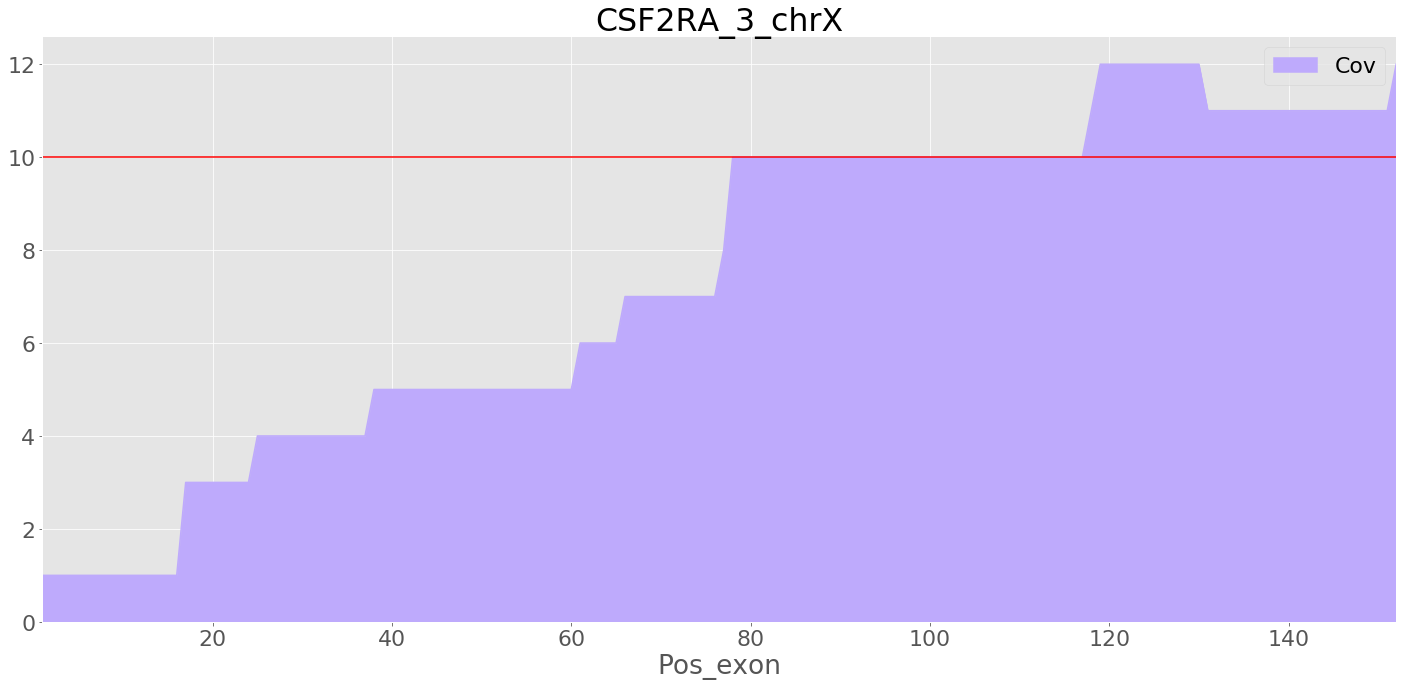

In [61]:
CSF5A2_4 = todos[todos['Exon'].str.contains('(?:\\s|^)CSF2RA_3_chrX(?:\\s|$)')]
plt.figure(figsize=(20,10))
CSF5A2_4.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'CSF2RA_3_chrX',color = [('#beaafc')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('CSF2A2_X.png')

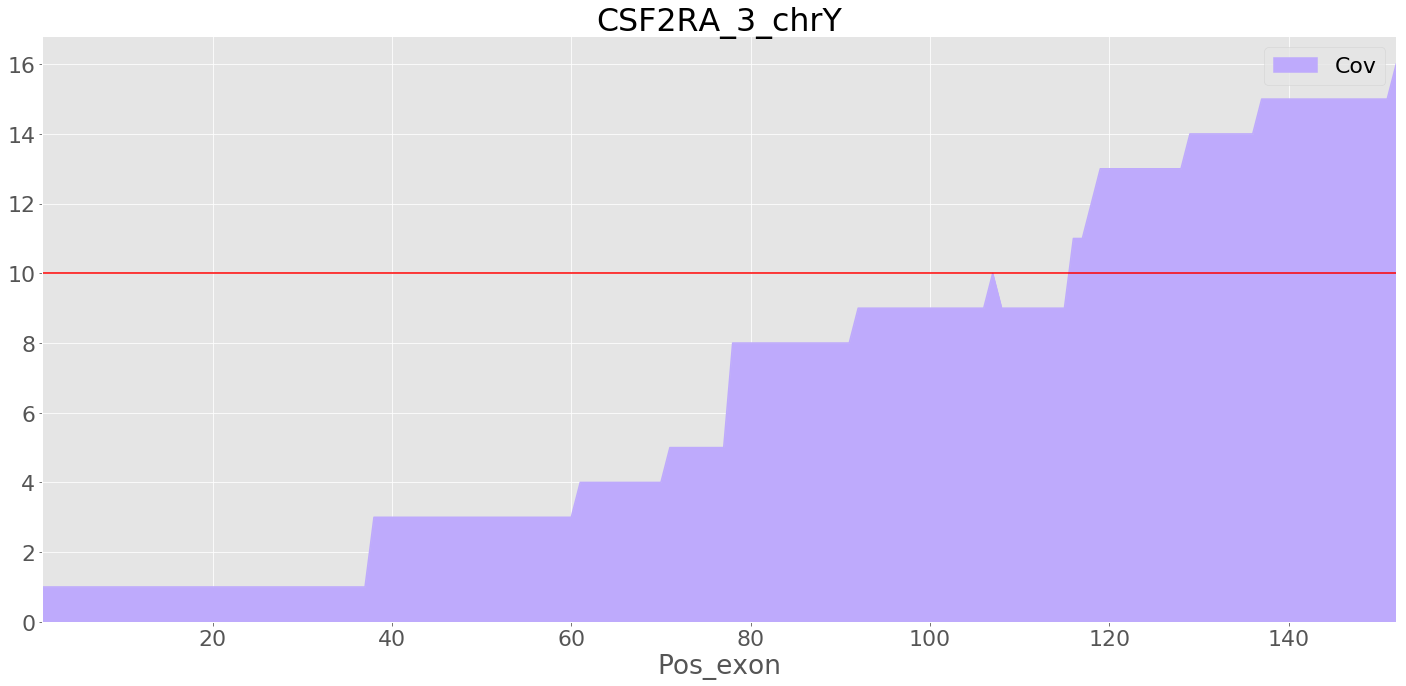

In [62]:
CSF5A2_4 = todos[todos['Exon'].str.contains('(?:\\s|^)CSF2RA_3_chrY(?:\\s|$)')]
plt.figure(figsize=(20,10))
CSF5A2_4.plot(kind='area', x='Pos_exon', y='Cov',figsize=(20, 10),title = 'CSF2RA_3_chrY',color = [('#beaafc')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
plt.savefig('CSF2A2_Y.png')

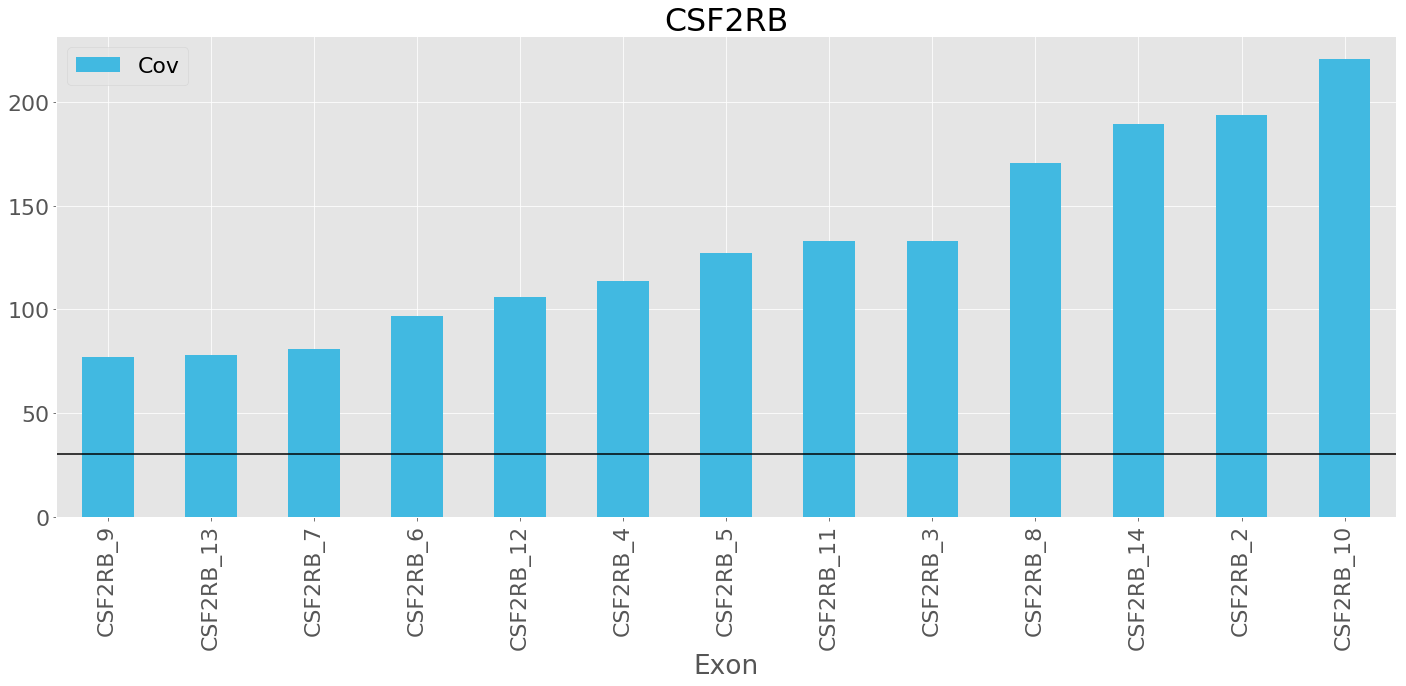

In [43]:
CSF2RB = todos[todos['Exon'].str.contains('^CSF2RB_')]
CSF2RB_1 = CSF2RB[['Cov','Exon']].groupby('Exon').mean()
x1 = CSF2RB_1.sort_values('Cov', ascending= True)
plot = x1.plot(kind="bar",figsize=(20, 10), title = 'CSF2RB',color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("CSF2RB.png", bbox_inches=0)

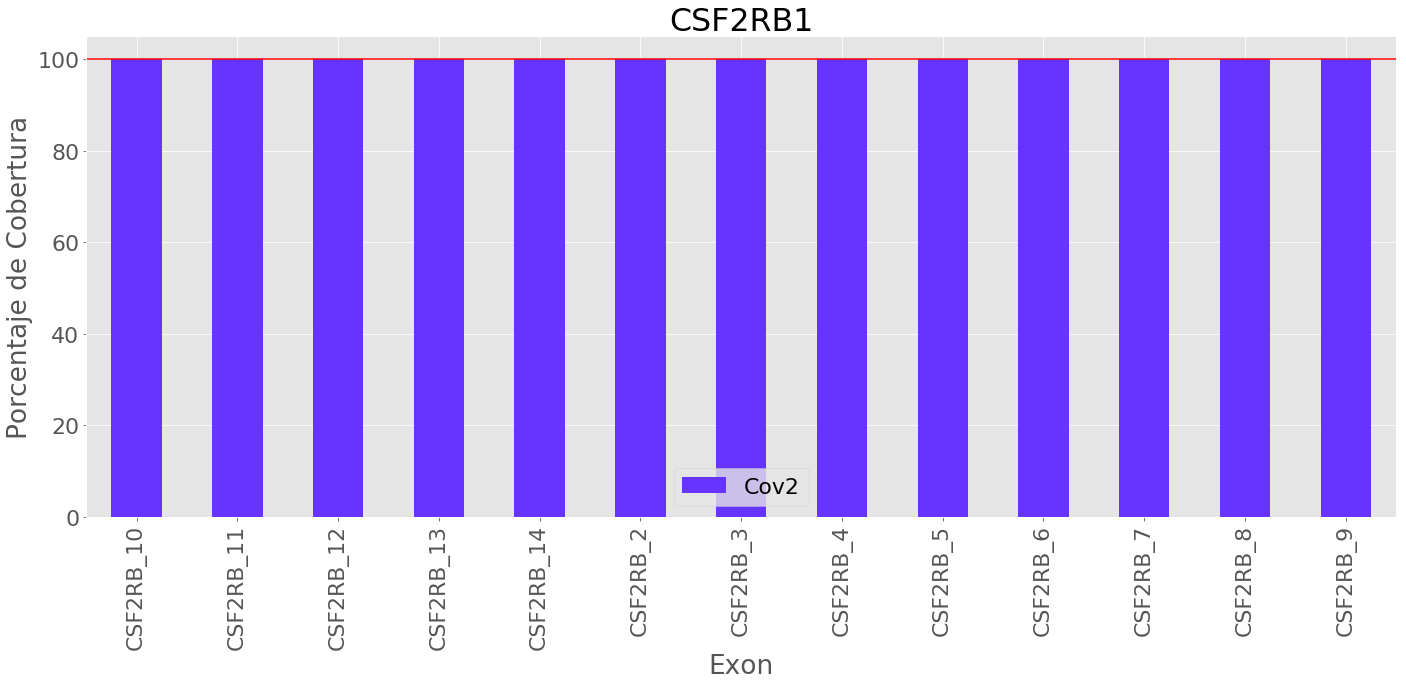

In [63]:
CSF2RB_1 = CSF2RB[['Cov2','Exon']].groupby('Exon').mean()*100
plot = CSF2RB_1.plot(kind="bar",figsize=(20, 10), title = 'CSF2RB1',color = [('#6633FF')],);plt.axhline(100, color='r');
fig = plot.get_figure()
plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
fig.savefig("CSF2RBAP.png", bbox_inches=0)

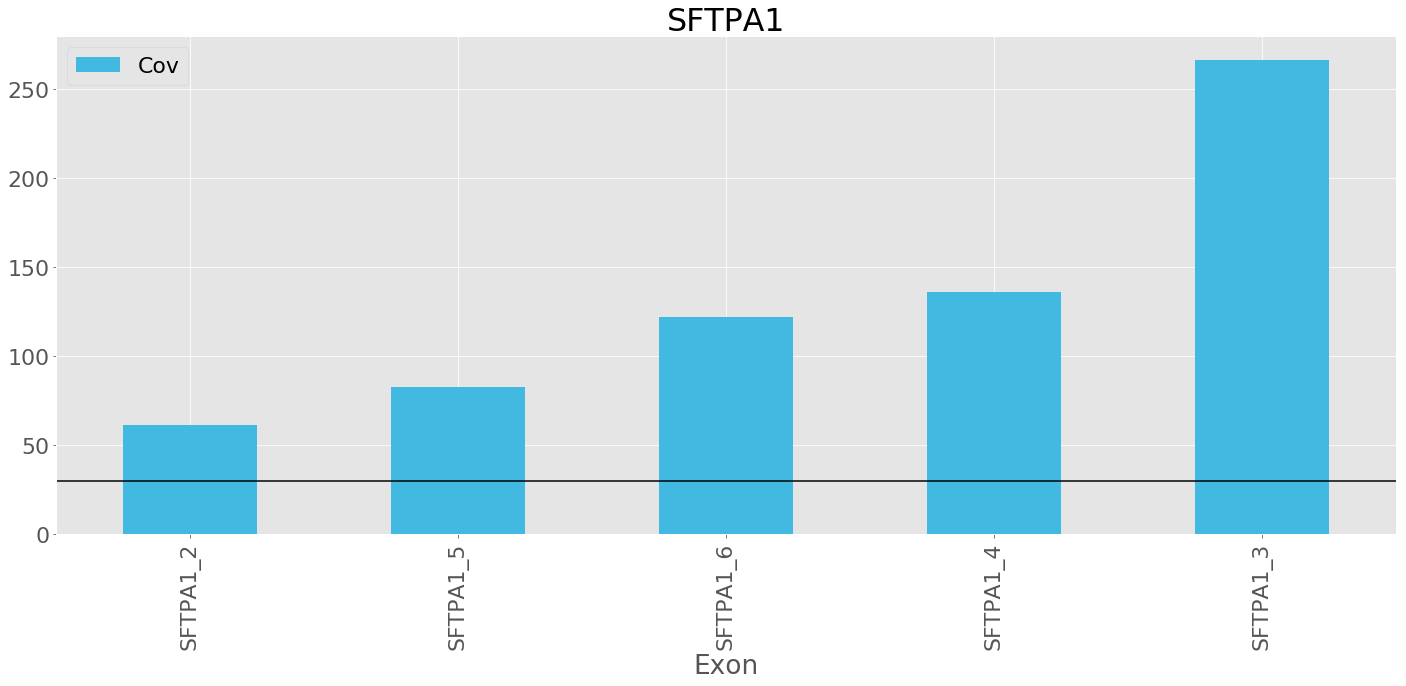

In [46]:
SFTPA1 = todos[todos['Exon'].str.contains('^SFTPA1_')]
SFTPA1_1 = SFTPA1[['Cov','Exon']].groupby('Exon').mean()
x1 = SFTPA1_1.sort_values('Cov', ascending= True)
plot = x1.plot(kind="bar",figsize=(20, 10), title = 'SFTPA1',color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("SFTPA1.png", bbox_inches=0)

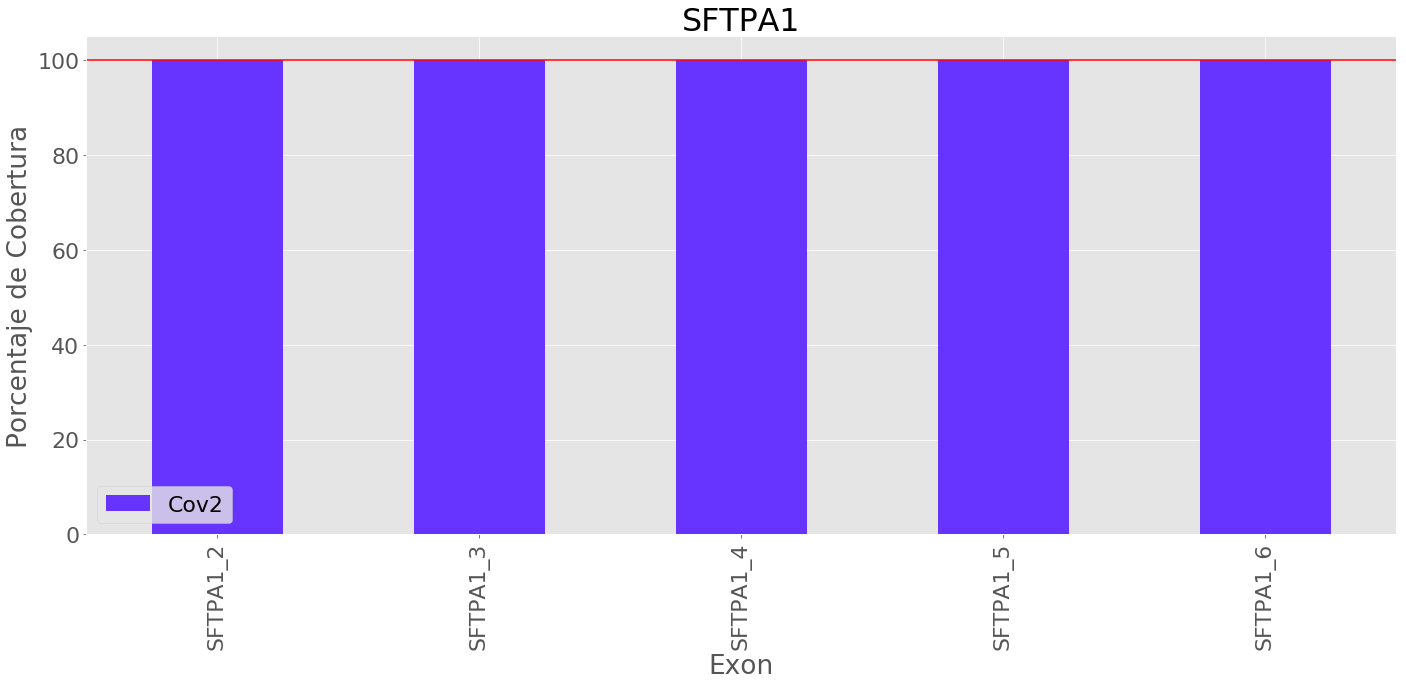

In [64]:
SFTPA1_1 = SFTPA1[['Cov2','Exon']].groupby('Exon').mean()*100
plot = SFTPA1_1.plot(kind="bar",figsize=(20, 10), title = 'SFTPA1',color = [('#6633FF')],);plt.axhline(100, color='r');
fig = plot.get_figure()
plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
fig.savefig("SFTPA1AP.png", bbox_inches=0)

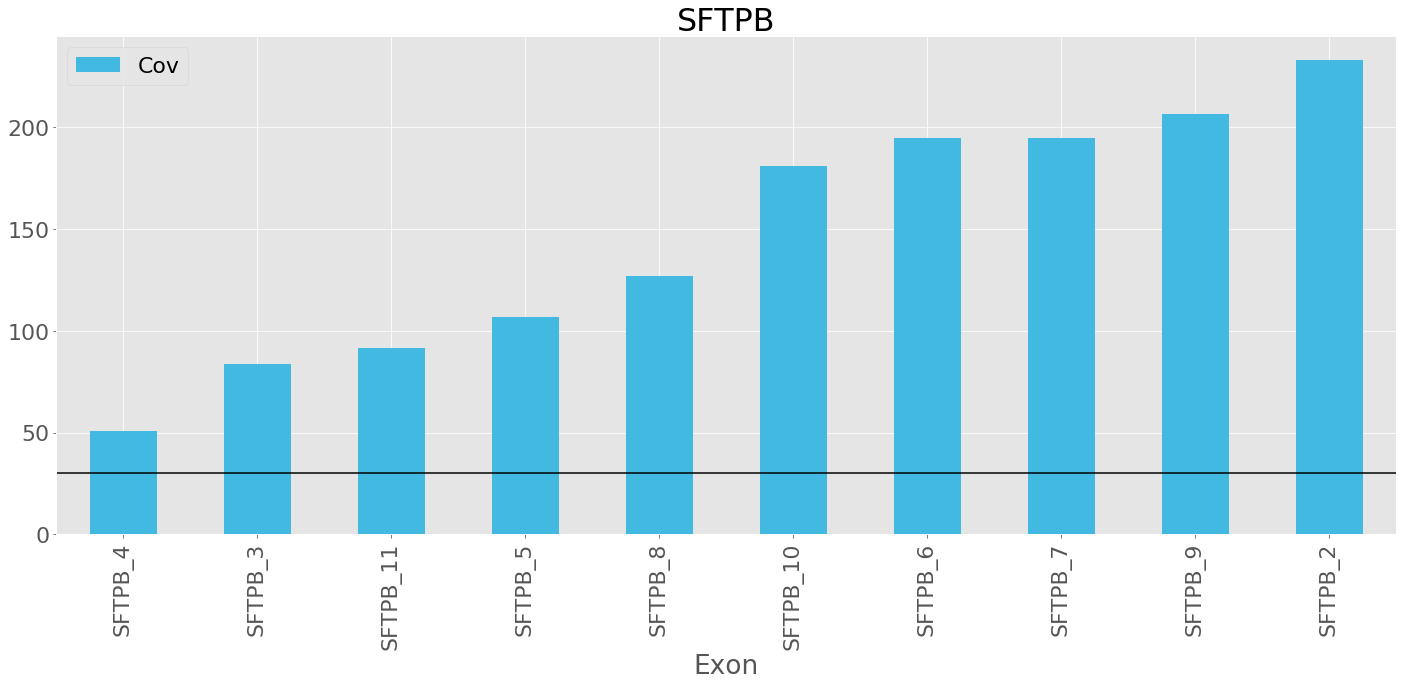

In [48]:
SFTPB = todos[todos['Exon'].str.contains('^SFTPB_')]
SFTPB_1 = SFTPB[['Cov','Exon']].groupby('Exon').mean()
x1 = SFTPB_1.sort_values('Cov', ascending= True)
plot = x1.plot(kind="bar",figsize=(20, 10), title = 'SFTPB',color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("SFTPB.png", bbox_inches=0)

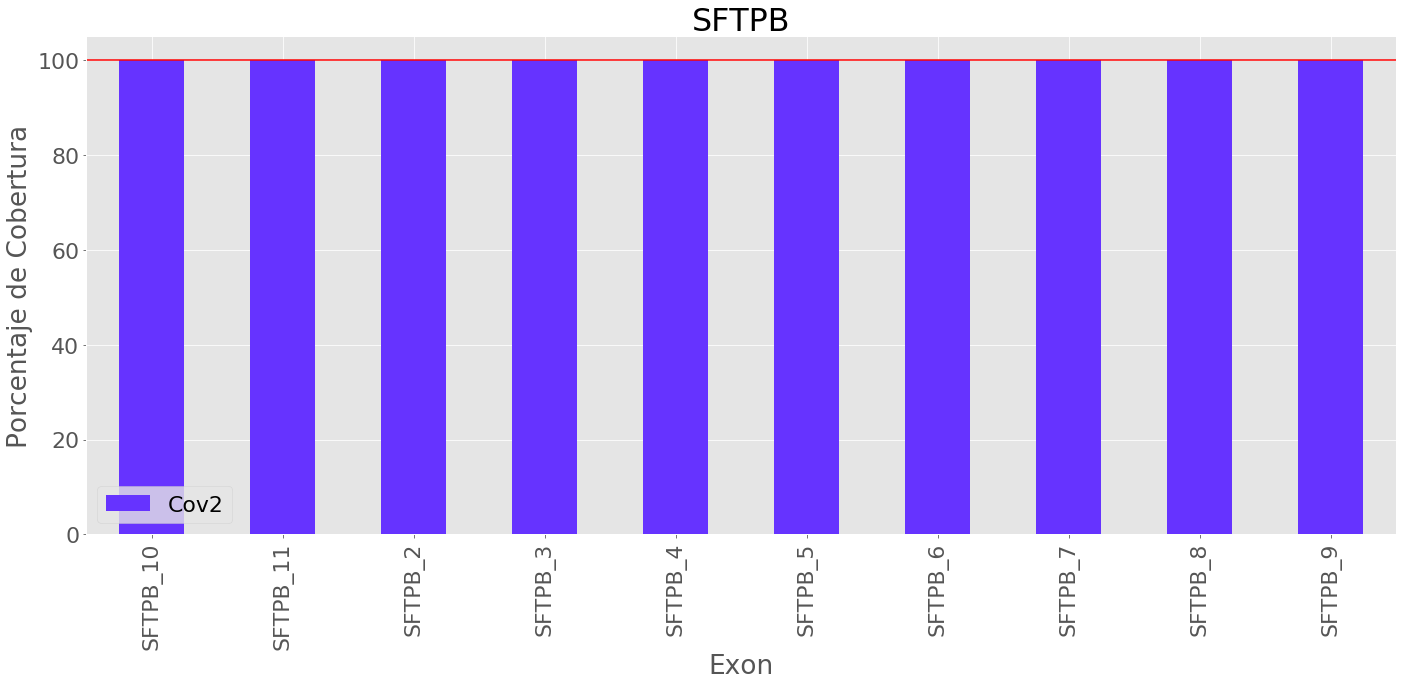

In [65]:
SFTPB_1 = SFTPB[['Cov2','Exon']].groupby('Exon').mean()*100
plot = SFTPB_1.plot(kind="bar",figsize=(20, 10), title = 'SFTPB',color = [('#6633FF')],);plt.axhline(100, color='r');
fig = plot.get_figure()
plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
fig.savefig("SFTPBAP.png", bbox_inches=0)

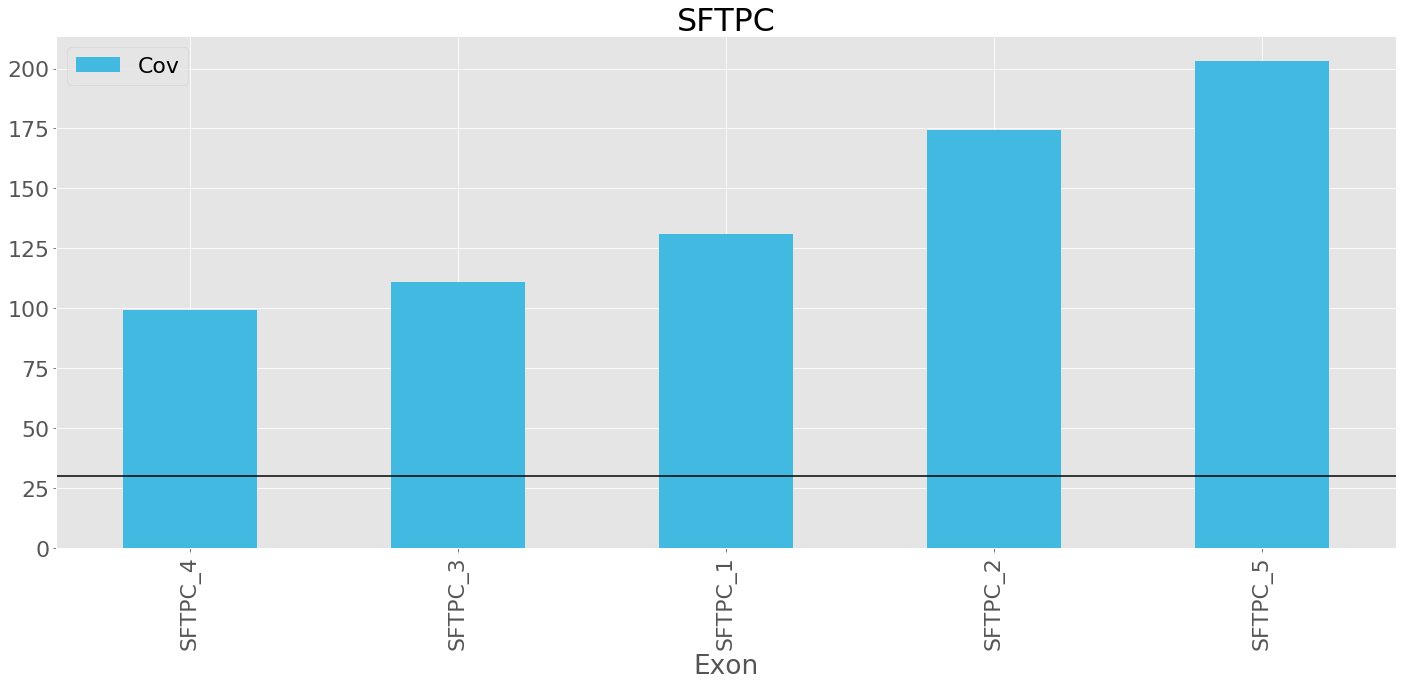

In [50]:
SFTPC = todos[todos['Exon'].str.contains('^SFTPC_')]
SFTPC_1 = SFTPC[['Cov','Exon']].groupby('Exon').mean()
x1 = SFTPC_1.sort_values('Cov', ascending= True)
plot = x1.plot(kind="bar",figsize=(20, 10), title = 'SFTPC',color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("SFTPC.png", bbox_inches=0)

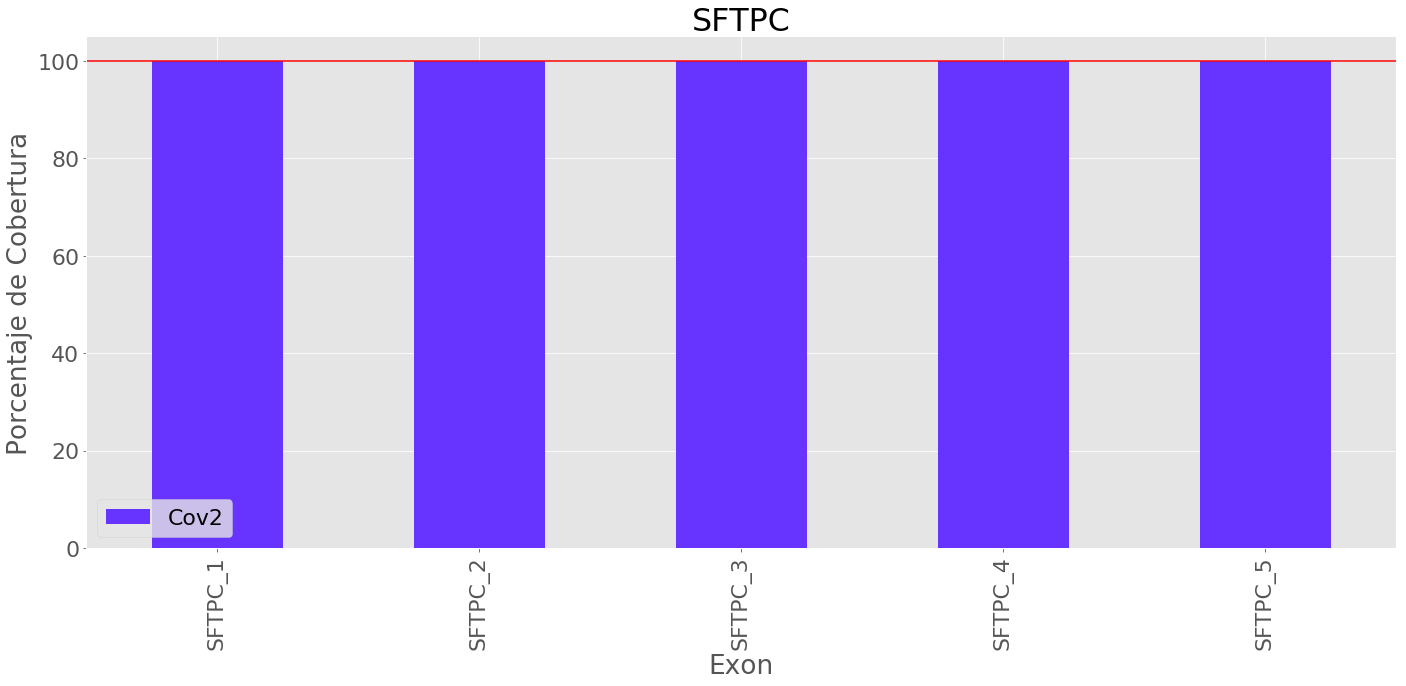

In [66]:
SFTPC_1 = SFTPC[['Cov2','Exon']].groupby('Exon').mean()*100
plot = SFTPC_1.plot(kind="bar",figsize=(20, 10), title = 'SFTPC',color = [('#6633FF')],);plt.axhline(100, color='r');
fig = plot.get_figure()
plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
fig.savefig("SFTPCAP.png", bbox_inches=0)

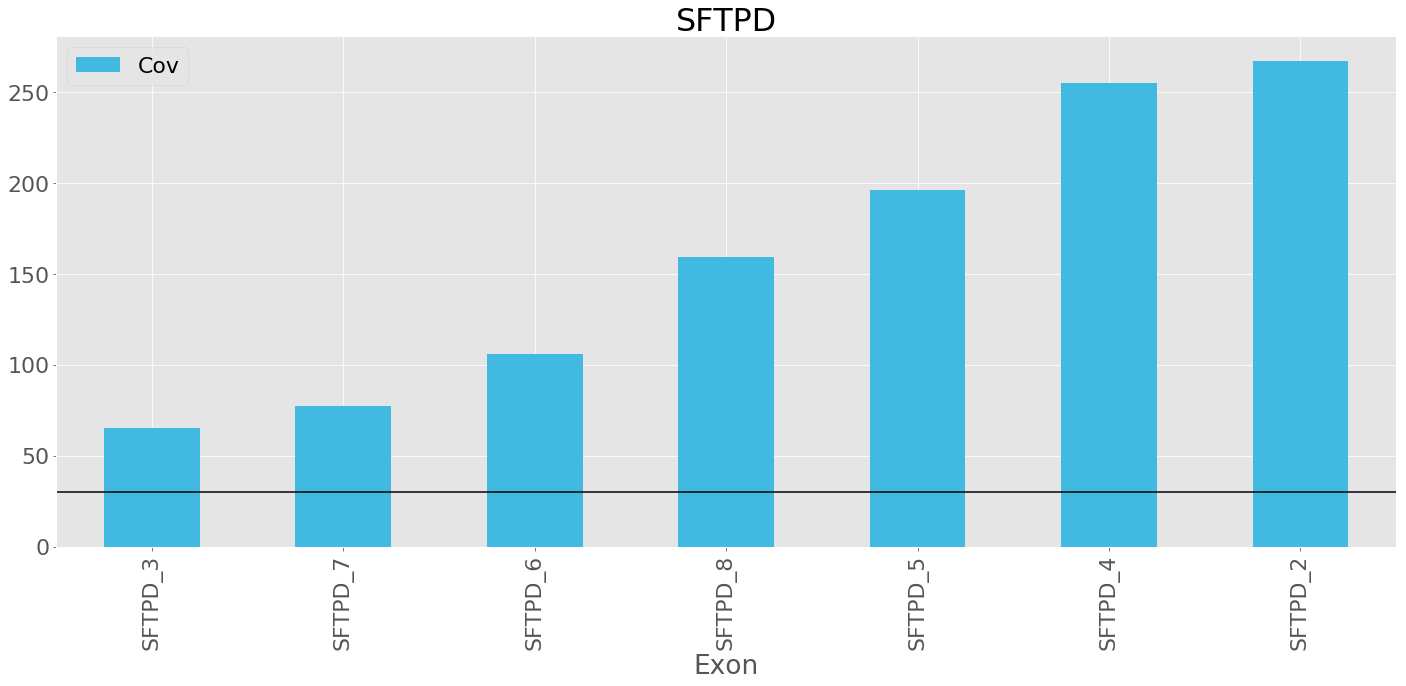

In [52]:
SFTPD = todos[todos['Exon'].str.contains('^SFTPD_')]
SFTPD_1 = SFTPD[['Cov','Exon']].groupby('Exon').mean()
x1 = SFTPD_1.sort_values('Cov', ascending= True)
plot = x1.plot(kind="bar",figsize=(20, 10), title = 'SFTPD',color = [('#41b9e1')]);plt.axhline(30, color='k')
fig = plot.get_figure()
fig.savefig("SFTPD.png", bbox_inches=0)

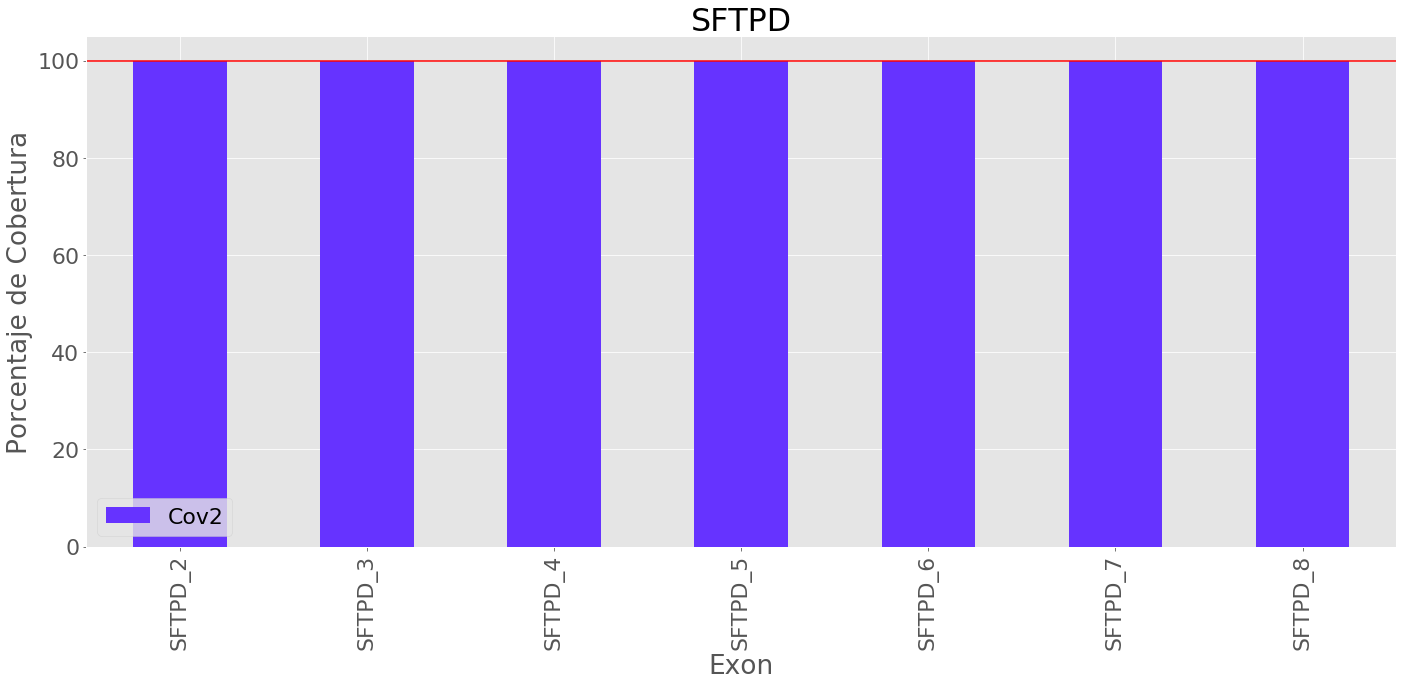

In [68]:
SFTPD_1 = SFTPD[['Cov2','Exon']].groupby('Exon').mean()*100
plot = SFTPD_1.plot(kind="bar",figsize=(20, 10), title = 'SFTPD',color = [('#6633FF')],);plt.axhline(100, color='r');
fig = plot.get_figure()
plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
fig.savefig("SFTPDAP.png", bbox_inches=0)